In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew
# configure matplotlib to output inline
%matplotlib inline


In [4]:
avacado=pd.read_csv('avocado.csv')
avacado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
# EDA Process ,check null values 
avacado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
avacado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [35]:
# By observing avocado data set we can aggrigate data by year,region,type
# we are aggrigation by year so not consider the date in the data set 
# Group by 'region','year','type'
df_avacado = pd.DataFrame(avacado.iloc[:,2:]).groupby(['region','year','type'], as_index=False).sum()
df_avacado


,region,year,type,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,Albany,2015,conventional,60.94,3962854.18,53969.48,3211741.19,34777.34,662366.17,644231.60,17997.07,137.50
1,Albany,2015,organic,99.09,67042.25,1667.41,8085.41,0.00,57289.43,57240.85,48.58,0.00
2,Albany,2016,conventional,69.98,5171564.06,280686.14,4128427.55,3359.23,759091.14,714231.33,23166.87,21692.94
3,Albany,2016,organic,89.55,92771.53,1972.58,11590.18,0.00,79208.77,79185.31,23.46,0.00
4,Albany,2017,conventional,80.90,5076262.79,163695.97,4196949.49,16056.16,699561.17,388024.75,292874.25,18663.17
...,...,...,...,...,...,...,...,...,...,...,...,...
427,WestTexNewMexico,2016,organic,85.63,944571.55,148679.41,342335.61,49675.45,403881.08,294897.90,108983.18,0.00
428,WestTexNewMexico,2017,conventional,47.89,46470457.90,26120631.73,5569858.06,584935.67,14195031.44,6200947.63,7978581.47,15501.34
429,WestTexNewMexico,2017,organic,85.39,919131.39,110910.95,199928.05,6140.15,602152.24,542490.16,59633.25,28.83
430,WestTexNewMexico,2018,conventional,10.29,11599670.32,5630655.06,2302508.25,119134.55,3547372.46,1606546.61,1915457.47,25368.38


In [36]:
df_avacado.corr()

,year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
year,1.000000,-0.593957,-0.059889,-0.066812,-0.080380,-0.096719,-0.015906,-0.022445,0.003768,0.014791
AveragePrice,-0.593957,1.000000,-0.039837,-0.055352,-0.022506,-0.031898,-0.038720,-0.036494,-0.044000,-0.034764
Total Volume,-0.059889,-0.039837,1.000000,0.982293,0.980464,0.926942,0.968414,0.975271,0.901552,0.873076
4046,-0.066812,-0.055352,0.982293,1.000000,0.943294,0.901067,0.931282,0.937455,0.869129,0.826816
4225,-0.080380,-0.022506,0.980464,0.943294,1.000000,0.935330,0.923906,0.938557,0.835174,0.819942
4770,-0.096719,-0.031898,0.926942,0.901067,0.935330,1.000000,0.861667,0.876665,0.772449,0.799759
Total Bags,-0.015906,-0.038720,0.968414,0.931282,0.923906,0.861667,1.000000,0.996481,0.962702,0.932188
Small Bags,-0.022445,-0.036494,0.975271,0.937455,0.938557,0.876665,0.996481,1.000000,0.936714,0.933194
Large Bags,0.003768,-0.044000,0.901552,0.869129,0.835174,0.772449,0.962702,0.936714,1.000000,0.875498
XLarge Bags,0.014791,-0.034764,0.873076,0.826816,0.819942,0.799759,0.932188,0.933194,0.875498,1.000000


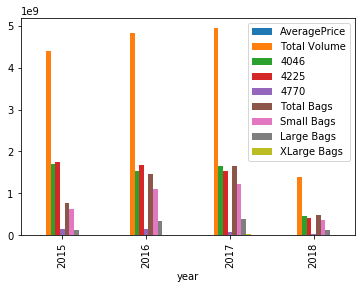

In [39]:
# Group by 'year'
df_avacado_year = pd.DataFrame(df_avacado).groupby(['year'], as_index=False).sum()
df_avacado_year.plot.bar(x="year")

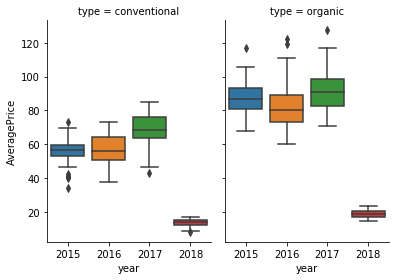

In [51]:
sns.catplot(x="year", y="AveragePrice",
               col="type",
                data=df_avacado, kind="box",
                height=4, aspect=.7);

In [53]:
# handling catagorical variables
df_avacado_data = pd.get_dummies(df_avacado, columns = ['region'], drop_first = True)

In [55]:
df_avacado_data

,year,type,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015,conventional,60.94,3962854.18,53969.48,3211741.19,34777.34,662366.17,644231.60,17997.07,...,0,0,0,0,0,0,0,0,0,0
1,2015,organic,99.09,67042.25,1667.41,8085.41,0.00,57289.43,57240.85,48.58,...,0,0,0,0,0,0,0,0,0,0
2,2016,conventional,69.98,5171564.06,280686.14,4128427.55,3359.23,759091.14,714231.33,23166.87,...,0,0,0,0,0,0,0,0,0,0
3,2016,organic,89.55,92771.53,1972.58,11590.18,0.00,79208.77,79185.31,23.46,...,0,0,0,0,0,0,0,0,0,0
4,2017,conventional,80.90,5076262.79,163695.97,4196949.49,16056.16,699561.17,388024.75,292874.25,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2016,organic,85.63,944571.55,148679.41,342335.61,49675.45,403881.08,294897.90,108983.18,...,0,0,0,0,0,0,0,0,0,1
428,2017,conventional,47.89,46470457.90,26120631.73,5569858.06,584935.67,14195031.44,6200947.63,7978581.47,...,0,0,0,0,0,0,0,0,0,1
429,2017,organic,85.39,919131.39,110910.95,199928.05,6140.15,602152.24,542490.16,59633.25,...,0,0,0,0,0,0,0,0,0,1
430,2018,conventional,10.29,11599670.32,5630655.06,2302508.25,119134.55,3547372.46,1606546.61,1915457.47,...,0,0,0,0,0,0,0,0,0,1


In [56]:
# Label Encoding for Object Column Which is Y
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_avacado_data['type'] = labelencoder.fit_transform(df_avacado_data['type'])
df_avacado_data['type']

# conventional - 0 ,organic-1

0      0
1      1
2      0
3      1
4      0
      ..
427    1
428    0
429    1
430    0
431    1
Name: type, Length: 432, dtype: int32

In [61]:
# Another Methode : IQR score technique to remove Outliers 
# df=df_avacado_data
# Q1 = df_avacado_data.quantile(0.25)
# Q3 = df_avacado_data.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR.shape)
# dfIQR = df_avacado_data[~((df_avacado_data < (Q1-1.5 * IQR)) |(df_avacado_data > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(dfIQR.shape)

(64,)
(8, 64)


In [65]:
x=df_avacado_data.drop('type',axis=1)
x

,year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015,60.94,3962854.18,53969.48,3211741.19,34777.34,662366.17,644231.60,17997.07,137.50,...,0,0,0,0,0,0,0,0,0,0
1,2015,99.09,67042.25,1667.41,8085.41,0.00,57289.43,57240.85,48.58,0.00,...,0,0,0,0,0,0,0,0,0,0
2,2016,69.98,5171564.06,280686.14,4128427.55,3359.23,759091.14,714231.33,23166.87,21692.94,...,0,0,0,0,0,0,0,0,0,0
3,2016,89.55,92771.53,1972.58,11590.18,0.00,79208.77,79185.31,23.46,0.00,...,0,0,0,0,0,0,0,0,0,0
4,2017,80.90,5076262.79,163695.97,4196949.49,16056.16,699561.17,388024.75,292874.25,18663.17,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2016,85.63,944571.55,148679.41,342335.61,49675.45,403881.08,294897.90,108983.18,0.00,...,0,0,0,0,0,0,0,0,0,1
428,2017,47.89,46470457.90,26120631.73,5569858.06,584935.67,14195031.44,6200947.63,7978581.47,15501.34,...,0,0,0,0,0,0,0,0,0,1
429,2017,85.39,919131.39,110910.95,199928.05,6140.15,602152.24,542490.16,59633.25,28.83,...,0,0,0,0,0,0,0,0,0,1
430,2018,10.29,11599670.32,5630655.06,2302508.25,119134.55,3547372.46,1606546.61,1915457.47,25368.38,...,0,0,0,0,0,0,0,0,0,1


In [67]:
y=df_avacado_data['type']
y=np.array(y).reshape(-1,1)

In [68]:
print(x.shape)
print(y.shape)

(432, 63)
(432, 1)


In [69]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
# default random random_state=42


In [77]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

def maxr2_score(regr,x,y):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state," is ",max_r_score)
    return final_r_state

# Define Classification Model

In [72]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()



In [73]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",sv))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))


*********** KNeighborsClassifier ************


max r2 score corresponding to 47  is  0.8158730158730159


random state value = 47
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  0.9583333333333334


Cross_Val_Score= 0.897943722943723


roc_auc_score= 0.9583333333333335


classification_report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.96      0.96      0.96        48

   micro avg       0.96      0.96      0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



[[46  2]
 [ 2 46]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ************


max r2 score corresponding to 0  is  0


random state value = 0
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_functio

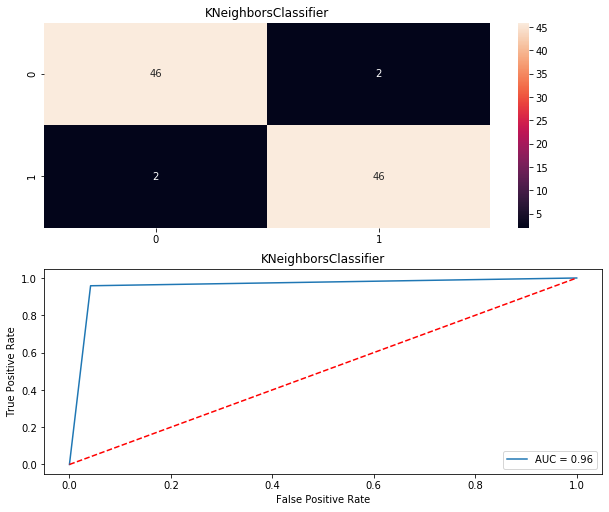

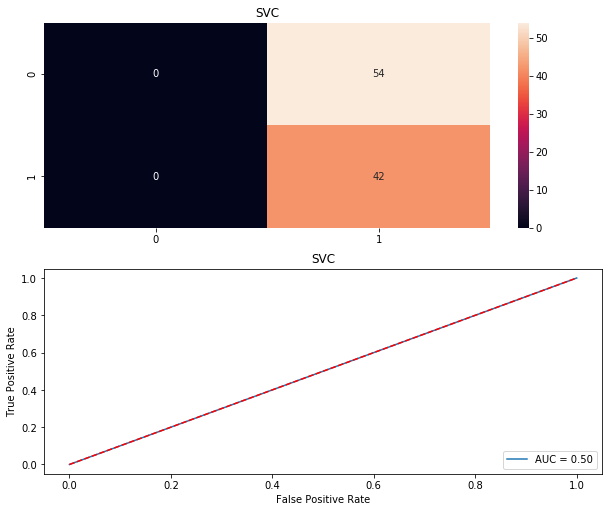

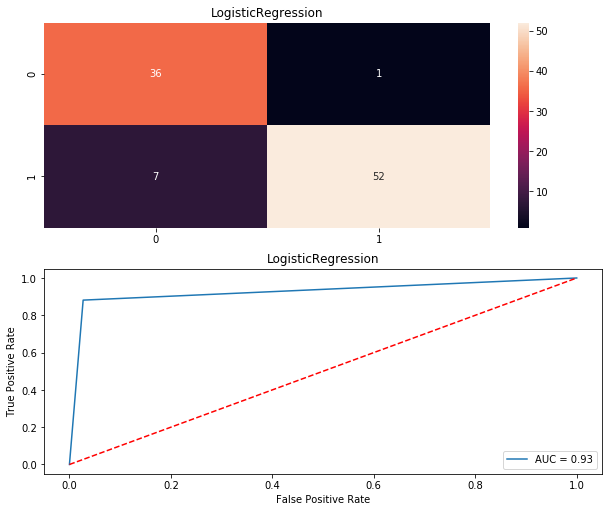

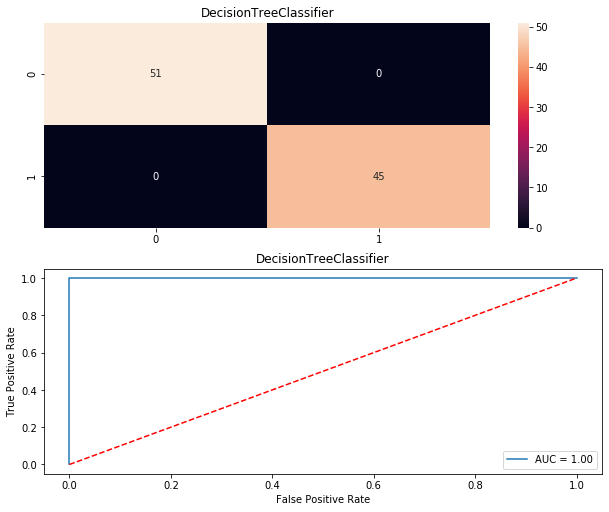

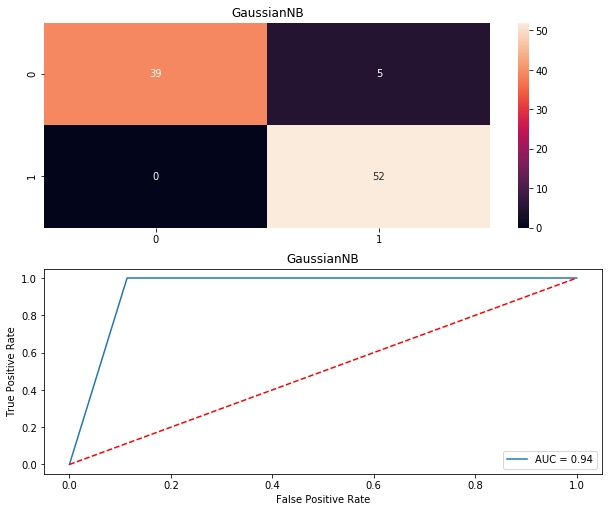

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
     


In [79]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs,'ROC_Auc_Curve':rocscore})
result

,Model,Accuracy_score,Cross_val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,95.833333,89.794372,95.833333
1,SVC,43.750000,50.000000,50.000000
2,LogisticRegression,91.666667,93.225108,92.716445
3,DecisionTreeClassifier,100.000000,96.958874,100.000000
4,GaussianNB,94.791667,85.389610,94.318182


In [80]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(DT,'DecisionTreeClassifier_Model')
OuModel=joblib.load('DecisionTreeClassifier_Model')
OuModel.predict(x_test)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0])

# conculsion 
Classification Regression model for Avocado dataset to clasify type of  conventional/organic,have been save best the model 
based on DecisionTreeClassifier 
